In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

**QUESTION 1**

Start using seasonal.decompose and perform ADF and KPSS

In [ ]:
df = pd.read_csv("/content/air-quality-india.csv")
print(df)

                 Timestamp  Year  Month  Day  Hour   PM2.5
0      2017-11-07 12:00:00  2017     11    7    12   64.51
1      2017-11-07 13:00:00  2017     11    7    13   69.95
2      2017-11-07 14:00:00  2017     11    7    14   92.79
3      2017-11-07 15:00:00  2017     11    7    15  109.66
4      2017-11-07 16:00:00  2017     11    7    16  116.50
...                    ...   ...    ...  ...   ...     ...
36187  2022-06-04 11:00:00  2022      6    4    11   35.89
36188  2022-06-04 12:00:00  2022      6    4    12   33.83
36189  2022-06-04 13:00:00  2022      6    4    13   33.05
36190  2022-06-04 14:00:00  2022      6    4    14   35.29
36191  2022-06-04 15:00:00  2022      6    4    15   40.67

[36192 rows x 6 columns]


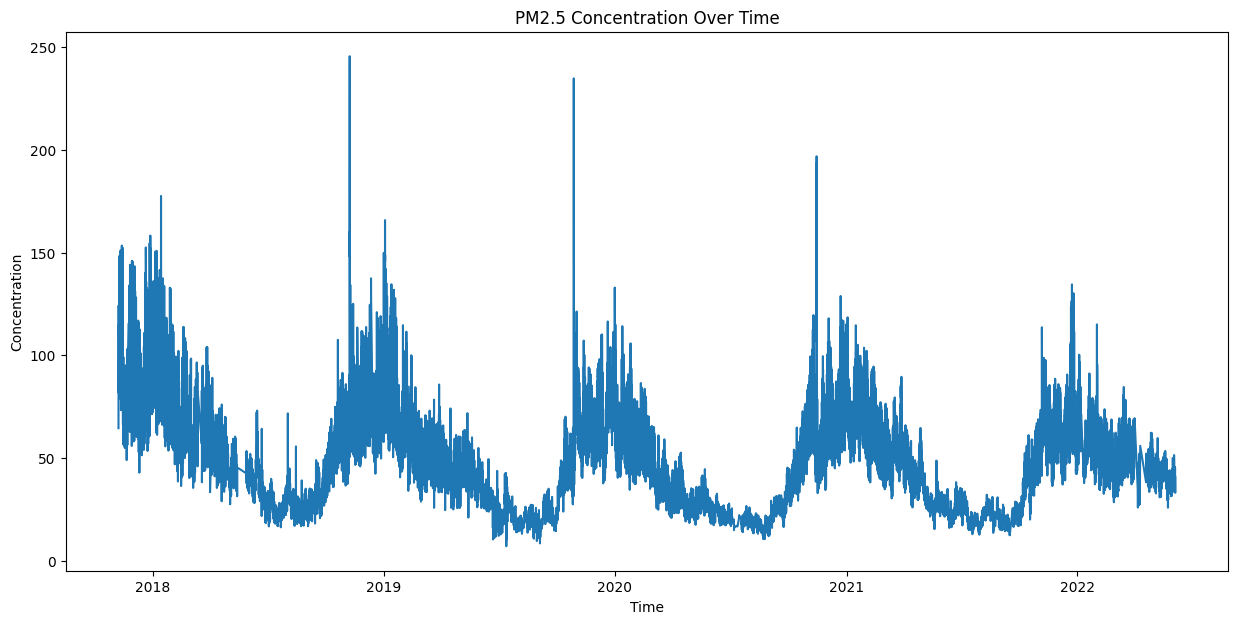

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['PM2.5'])
plt.title("PM2.5 Concentration Over Time")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

Converting to DateTime Index

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

If .mean() was not used, then it would just return a Date Time Sampler object.

In [ ]:
daily_avg_pm25 = df['PM2.5'].resample('D').mean()
print(daily_avg_pm25)

Timestamp
2017-11-07     99.805833
2017-11-08    110.979565
2017-11-09    114.915833
2017-11-10    119.404091
2017-11-11    109.267273
                 ...    
2022-05-31     41.465417
2022-06-01     41.645833
2022-06-02     42.255417
2022-06-03     39.425417
2022-06-04     38.503750
Freq: D, Name: PM2.5, Length: 1671, dtype: float64


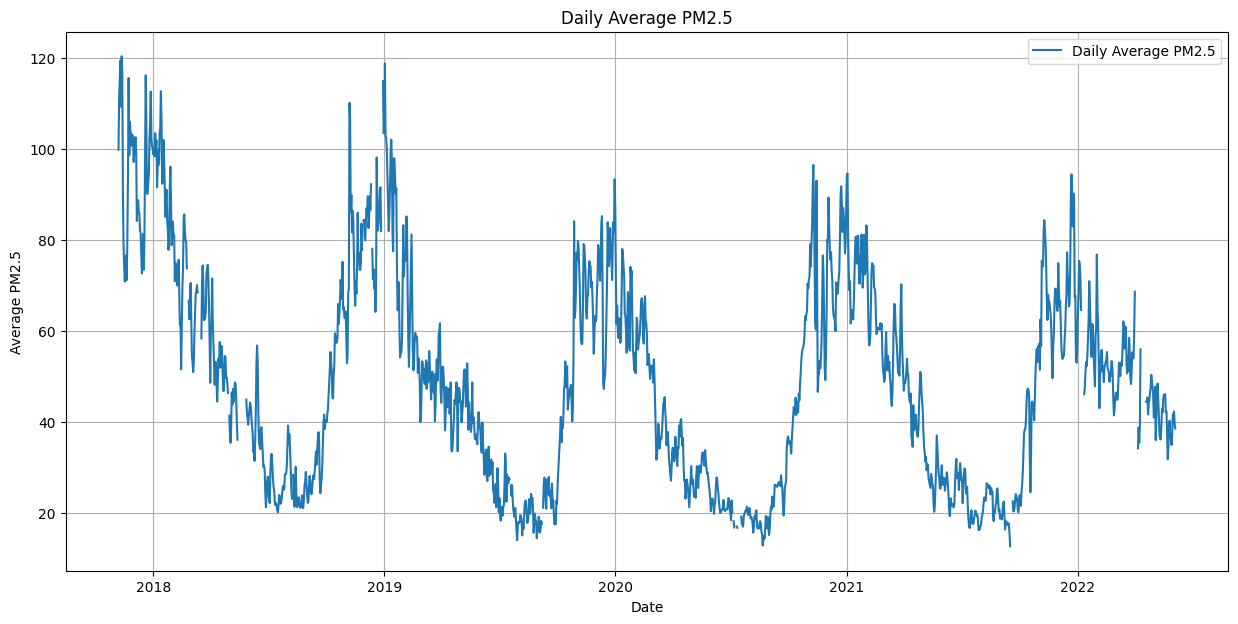

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(daily_avg_pm25, label='Daily Average PM2.5')
plt.title('Daily Average PM2.5')
plt.xlabel('Date')
plt.ylabel('Average PM2.5')
plt.legend()
plt.grid(True)
plt.show()

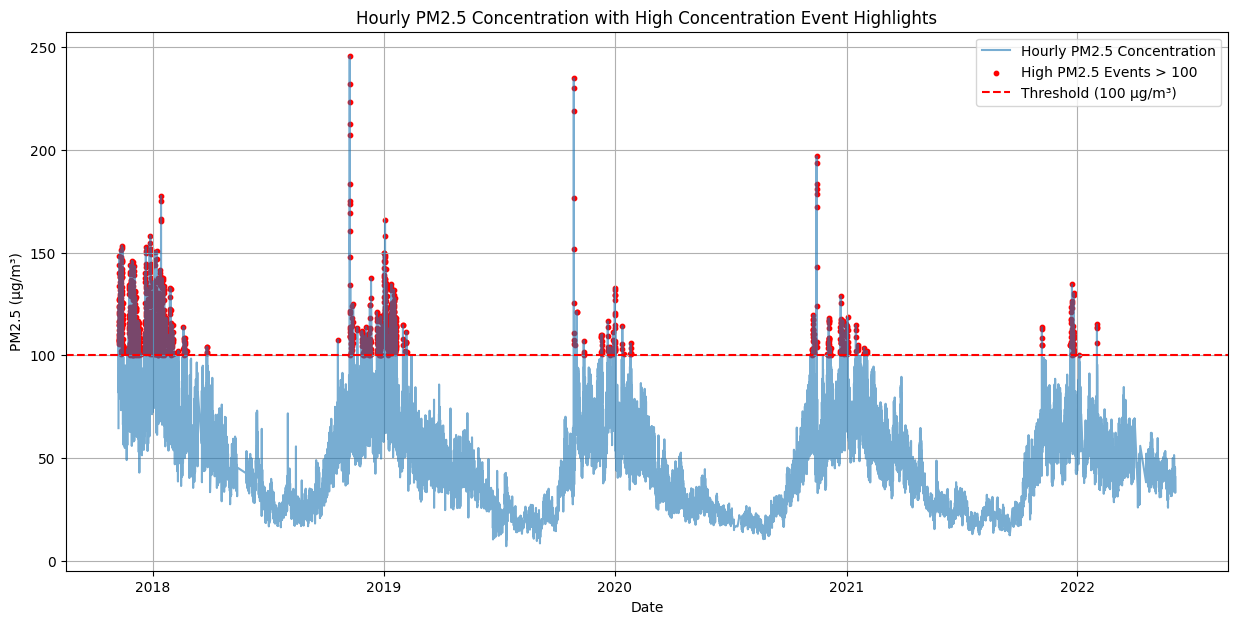

In [ ]:
threshold = 100
high_pm25_events = df[df['PM2.5'] > threshold]
plt.figure(figsize=(15, 7))

plt.plot(df['PM2.5'], label='Hourly PM2.5 Concentration', alpha=0.6)

plt.scatter(high_pm25_events.index, high_pm25_events['PM2.5'], color='red', s=10, label=f'High PM2.5 Events > {threshold}')

plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold} µg/m³)')

plt.title('Hourly PM2.5 Concentration with High Concentration Event Highlights')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

**QUESTION 2**

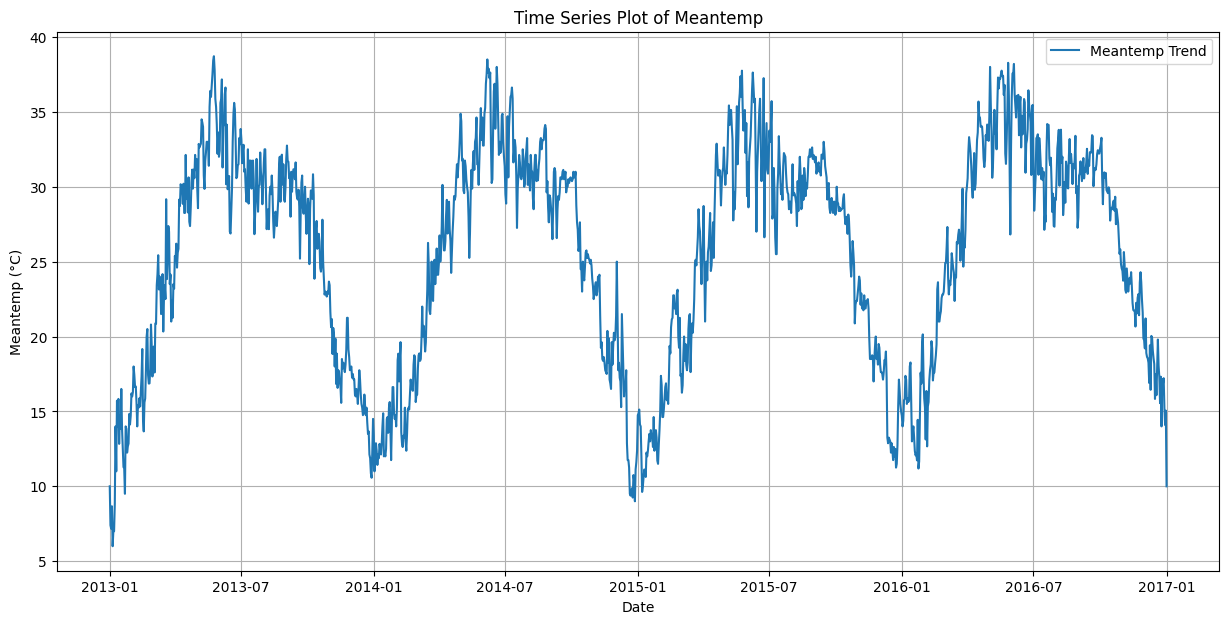

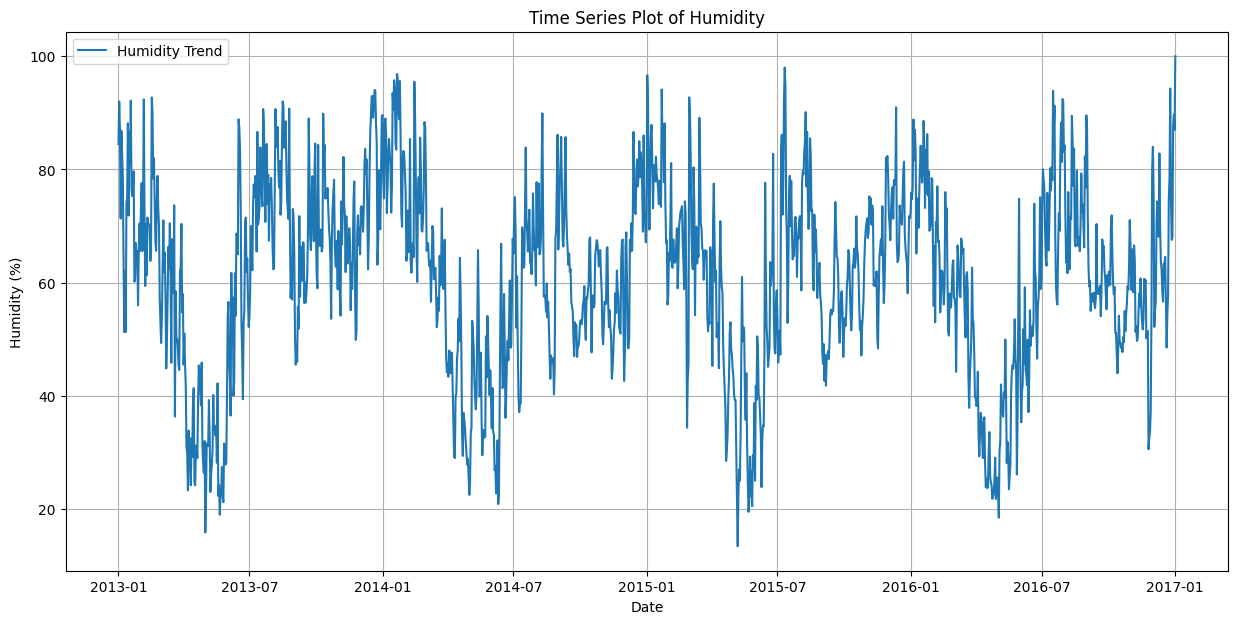

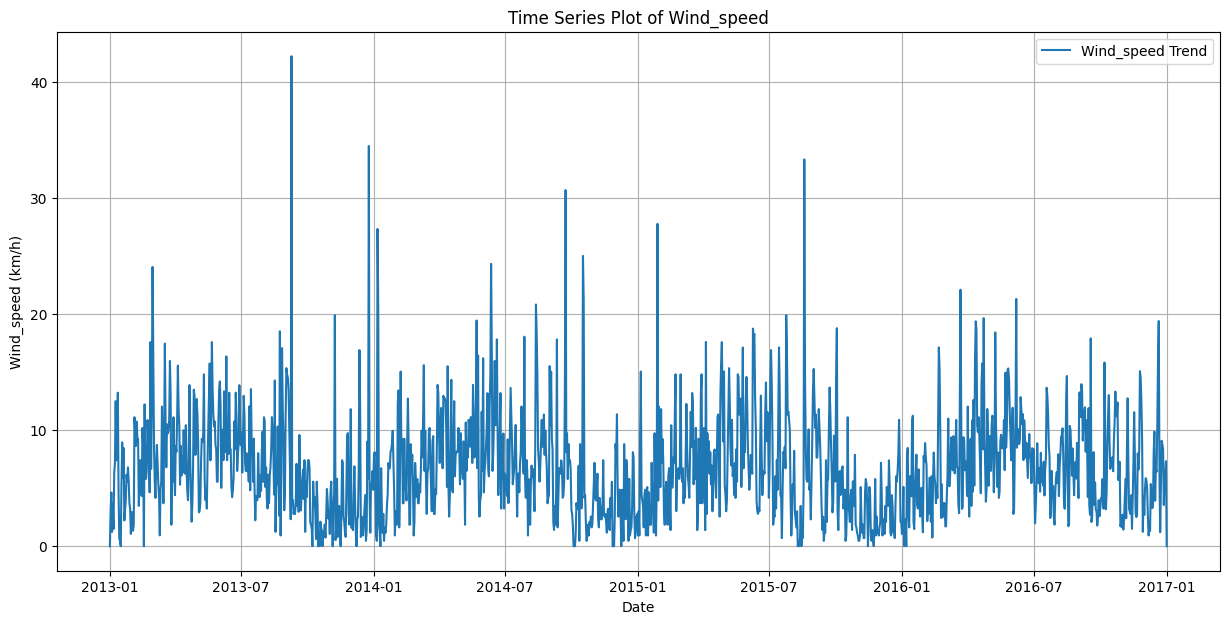

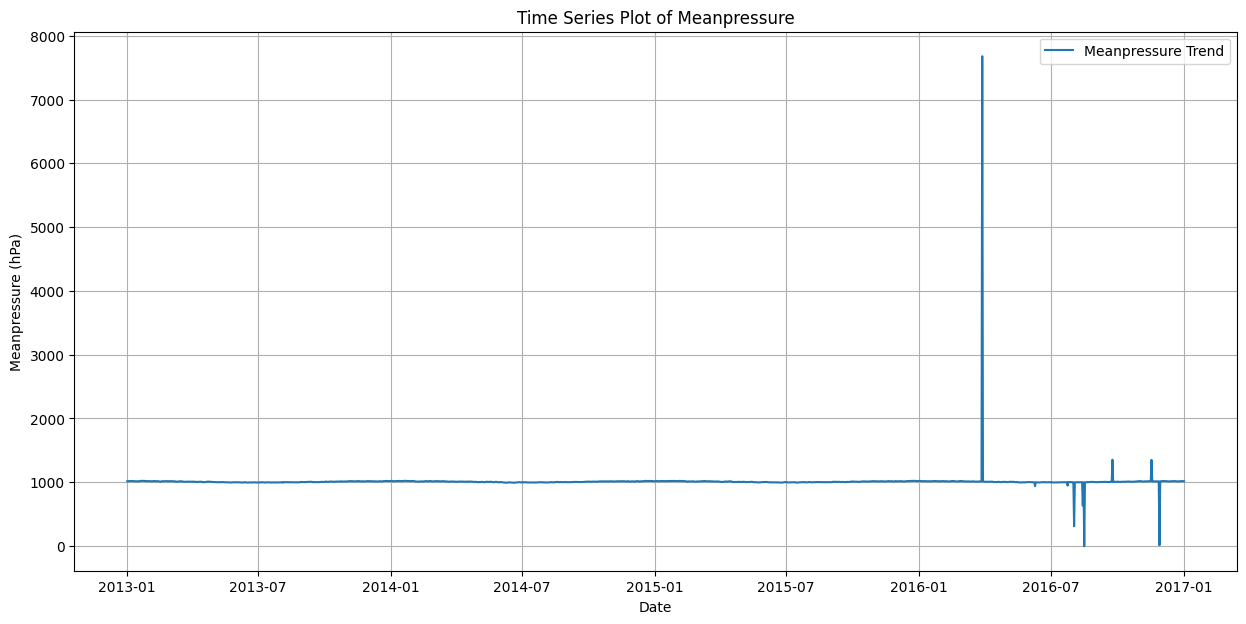

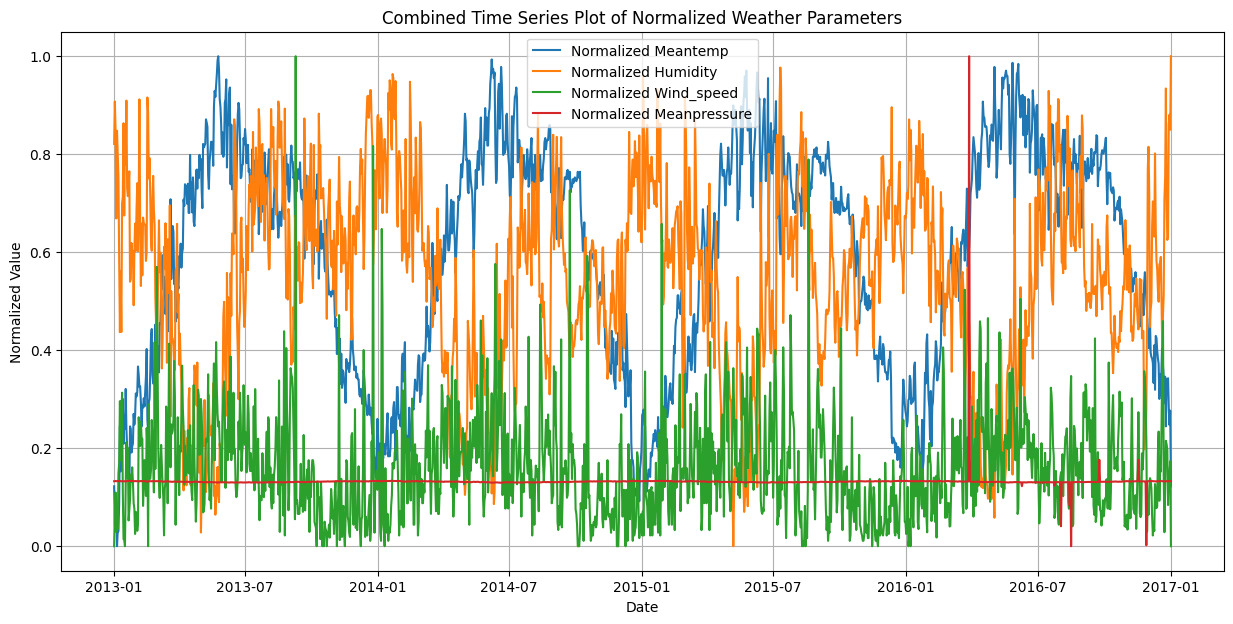

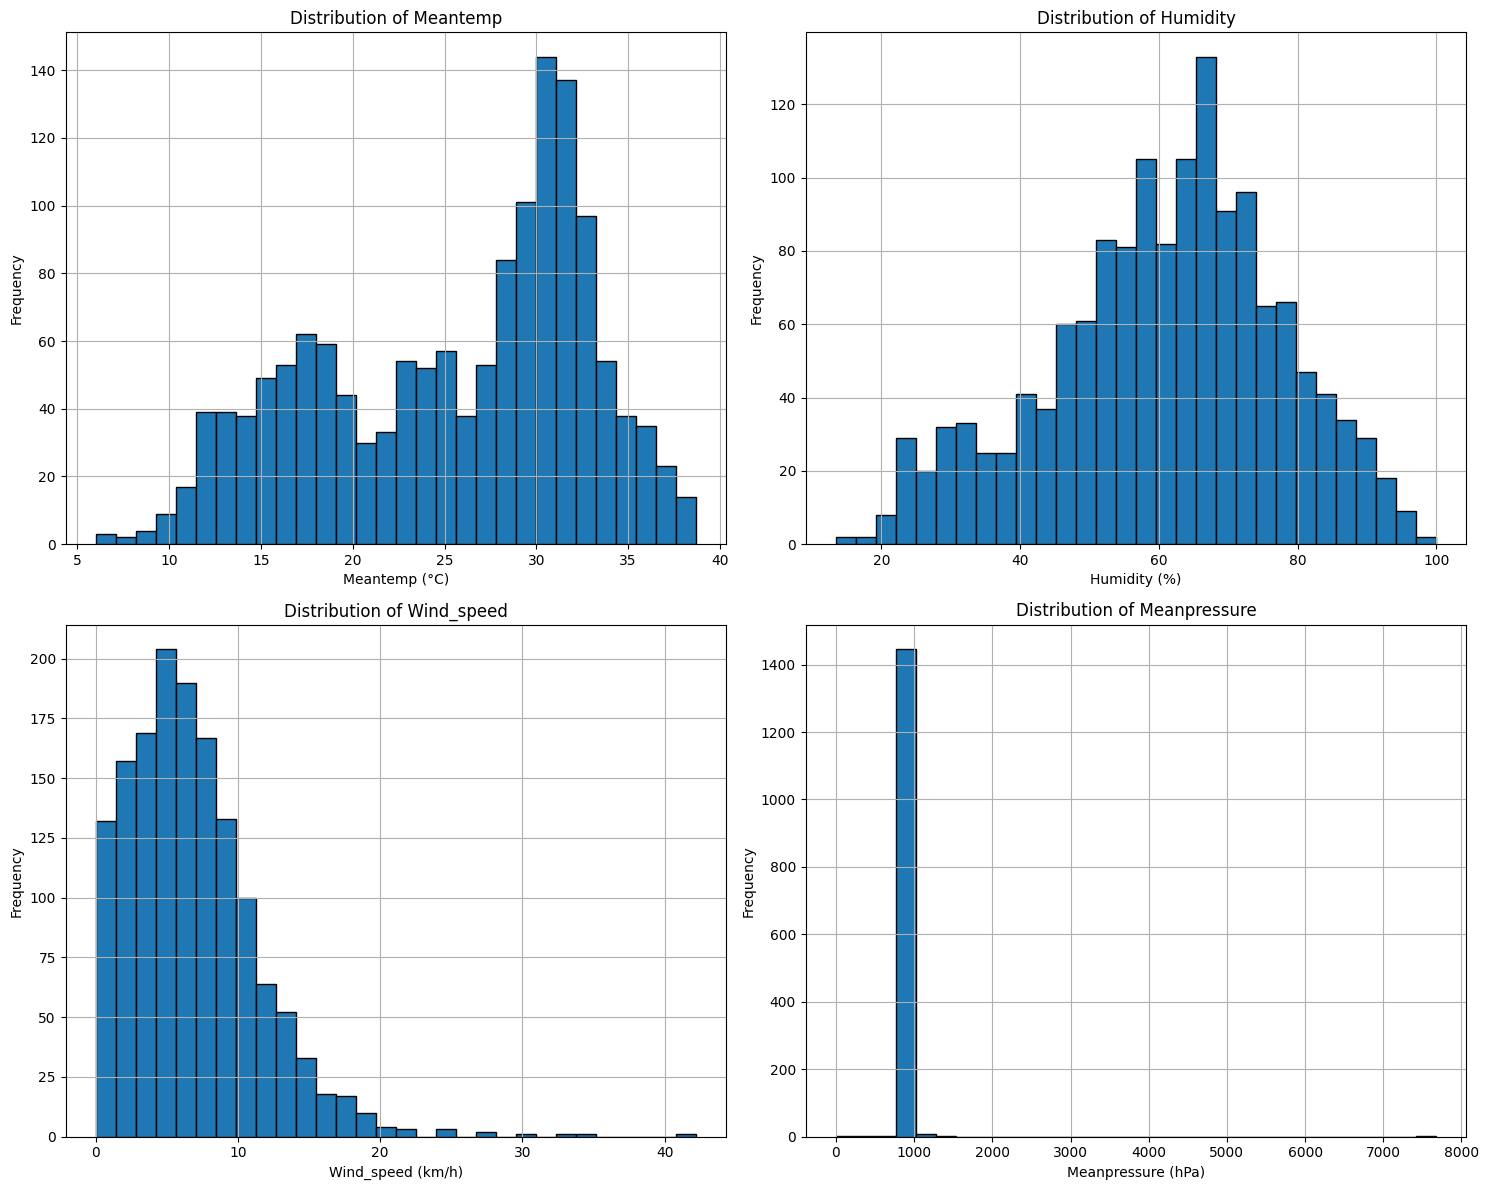

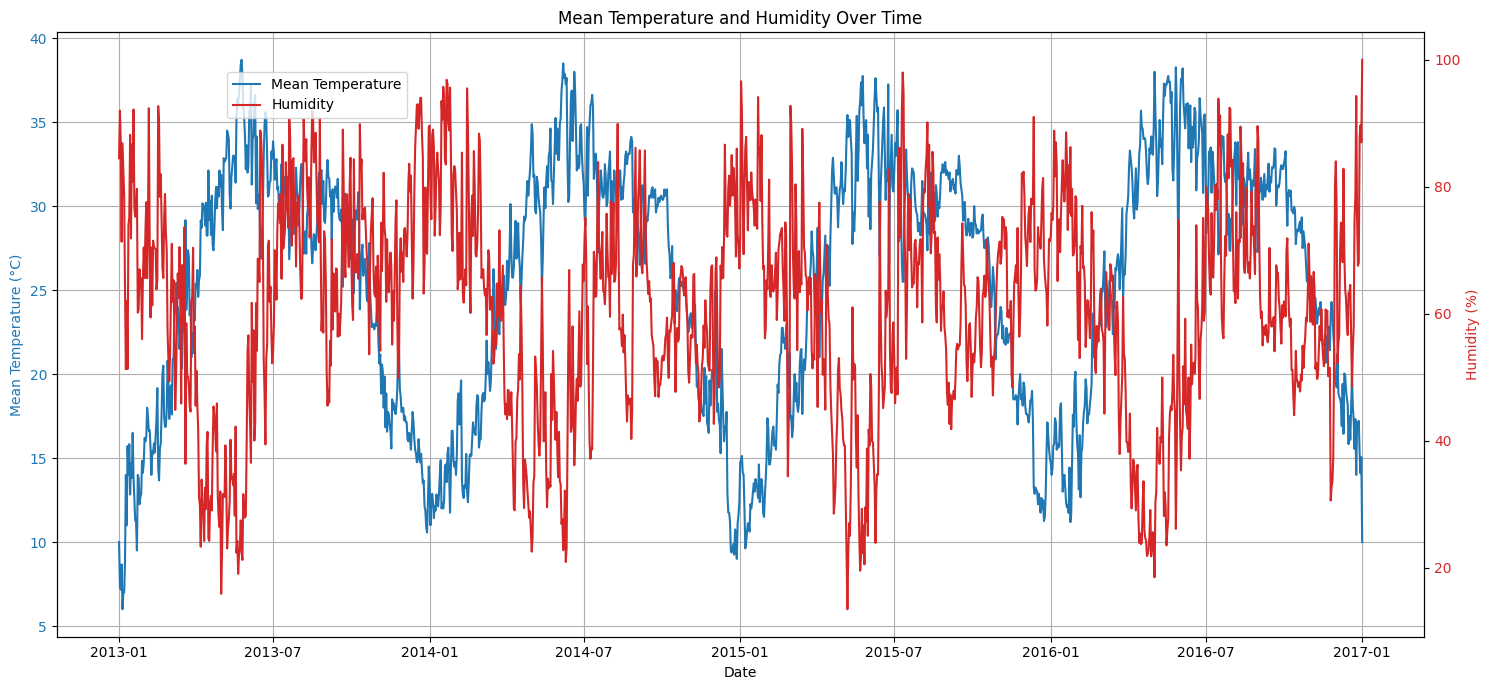

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('DailyDelhiClimateTrain.csv')

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

weather_params = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
units = {
    'meantemp': '°C',
    'humidity': '%',
    'wind_speed': 'km/h',
    'meanpressure': 'hPa'
}

for param in weather_params:
    plt.figure(figsize=(15, 7))
    plt.plot(df.index, df[param], label=f'{param.capitalize()} Trend')
    plt.title(f'Time Series Plot of {param.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel(f'{param.capitalize()} ({units[param]})')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()


plt.figure(figsize=(15, 7))

normalized_df = (df[weather_params] - df[weather_params].min()) / (df[weather_params].max() - df[weather_params].min())
for param in weather_params:
    plt.plot(normalized_df.index, normalized_df[param], label=f'Normalized {param.capitalize()}')
plt.title('Combined Time Series Plot of Normalized Weather Parameters')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
for i, param in enumerate(weather_params):
    axes[i].hist(df[param], bins=30, edgecolor='k')
    axes[i].set_title(f'Distribution of {param.capitalize()}')
    axes[i].set_xlabel(f'{param.capitalize()} ({units[param]})')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)
plt.tight_layout()
plt.show()
plt.close()

fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Mean Temperature and Humidity Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel(f'Mean Temperature ({units["meantemp"]})', color='tab:blue')
ax1.plot(df.index, df['meantemp'], color='tab:blue', label='Mean Temperature')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel(f'Humidity ({units["humidity"]})', color='tab:red')
ax2.plot(df.index, df['humidity'], color='tab:red', label='Humidity')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
fig.tight_layout()
plt.show()
plt.close()


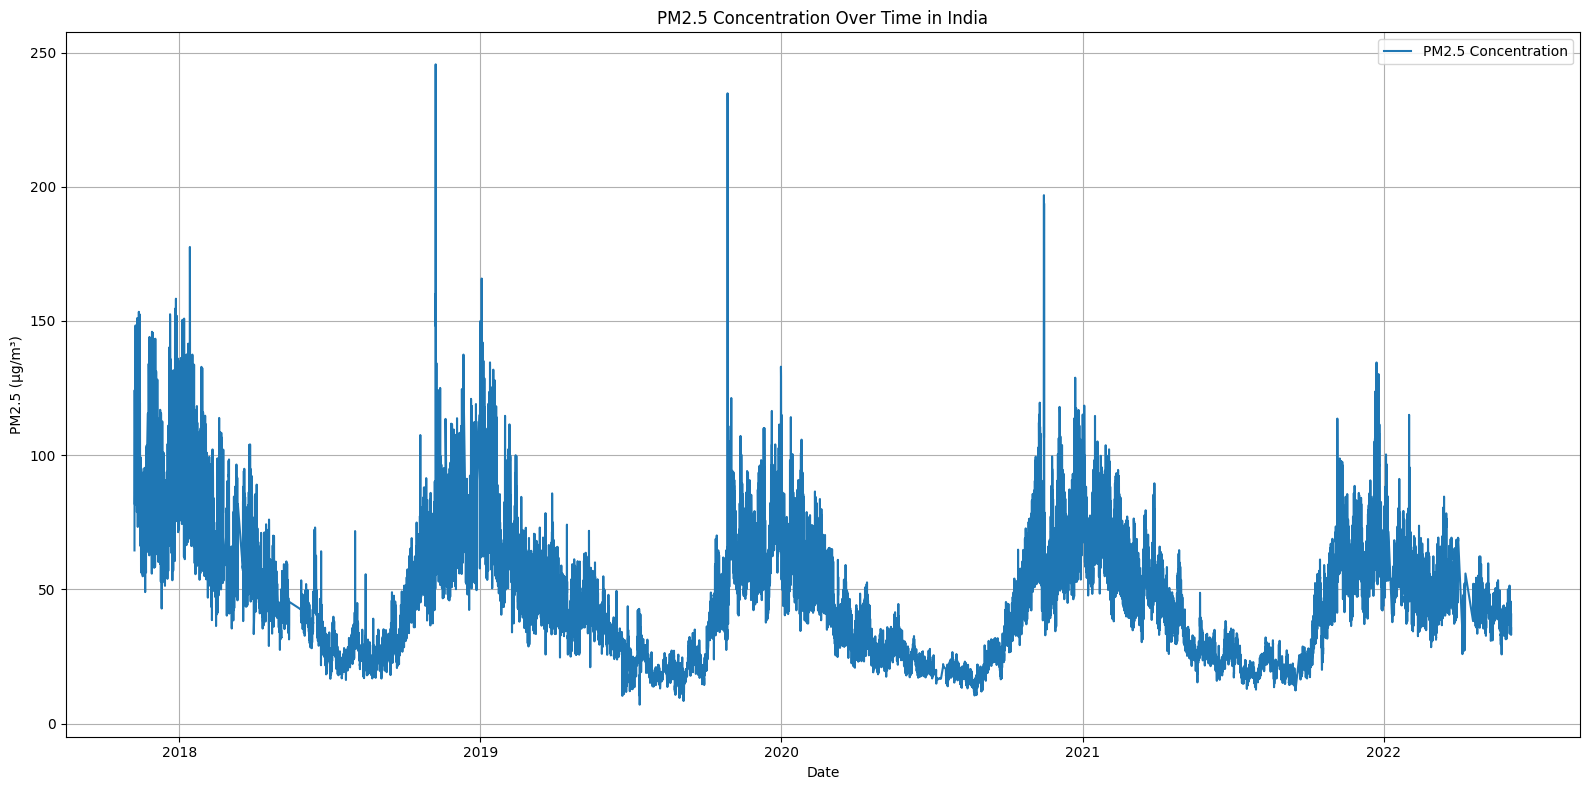

In [ ]:
df = pd.read_csv('air-quality-india.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

pm25_series = df['PM2.5'].dropna()

plt.figure(figsize=(16, 8))
plt.plot(pm25_series, label='PM2.5 Concentration')
plt.title('PM2.5 Concentration Over Time in India')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("\n--- Augmented Dickey-Fuller (ADF) Test Results ---")

adf_result = adfuller(pm25_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

if adf_result[1] <= 0.05:
    print("Conclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.")
    print("This suggests that the PM2.5 time series is stationary (or trend-stationary).")
else:
    print("Conclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("This suggests that the PM2.5 time series is non-stationary (it has a unit root).")


--- Augmented Dickey-Fuller (ADF) Test Results ---
ADF Statistic: -5.168240225624
p-value: 1.02041748581588e-05
Critical Values:
   1%: -3.430530966421994
   5%: -2.8616199827658604
   10%: -2.566812572298683
Conclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.
This suggests that the PM2.5 time series is stationary (or trend-stationary).


In [ ]:
print("\n--- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test Results ---")
kpss_result = kpss(pm25_series, regression='c')

print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print('Critical Values:')
for key, value in kpss_result[3].items():
    print(f'   {key}: {value}')

if kpss_result[1] > 0.05:
    print("Conclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("This suggests that the PM2.5 time series is stationary around a constant mean.")
else:
    print("Conclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.")
    print("This suggests that the PM2.5 time series is non-stationary (it has a unit root or a trend).")


--- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test Results ---
KPSS Statistic: 2.5364823419527145
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.
This suggests that the PM2.5 time series is non-stationary (it has a unit root or a trend).


/tmp/ipython-input-2742629080.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(pm25_series, regression='c')
